In [113]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [114]:
df = pd.read_csv('San_Juan_train.csv', index_col = 0)

In [115]:
df.index = pd.to_datetime(df.index)
df.sort_index(inplace = True)

In [116]:
print('------ Basic Stats about the San Juan Training set ------ \n')
print(f'- Number of rows of the training set: {len(df)} \n')
print(f'- Number of columns of the training set: {len(df.columns)}, where the last on is the label \n')
perc = np.round(100 * df.isna().sum().sum() / (len(df) * len(df.columns)), 2)
print(f'- Percentage of missing values across the entire dataset {perc}% \n')
url = 'https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/page/82/'
print(f'- Description for all variables can be found here: {url} \n')

------ Basic Stats about the San Juan Training set ------ 

- Number of rows of the training set: 936 

- Number of columns of the training set: 23, where the last on is the label 

- Percentage of missing values across the entire dataset 1.77% 

- Description for all variables can be found here: https://www.drivendata.org/competitions/44/dengai-predicting-disease-spread/page/82/ 



In [117]:
# When we are filling NAs using a rolling window = 4, it means that if a value is NA then we take the mean
# of the 3 values that come before it chronologically and assign it to that value.
# Also the values that are not NA do not change (Just to be clear)!

In [118]:
df.head()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
week_start_date,,,,,,,,,,,,,,,,,,,,,
1990-04-30,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1990-05-07,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
1990-05-14,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
1990-05-21,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
1990-05-28,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [119]:
for col in df.columns[:-1]: # exclude the label variable
    df[col] = df[col].fillna(df.rolling(window = 4,
                                        min_periods = 1).mean()[col])

In [120]:
new_perc = np.round(100 * df.isna().sum().sum() / (len(df) * len(df.columns)), 2)
print(f'- The amount of NAs was reduced to {new_perc}% \n')
print('- For the next step we will fill the remaining NAs with zeroes \n')

- The amount of NAs was reduced to 0.21% 

- For the next step we will fill the remaining NAs with zeroes 



In [121]:
df = df.fillna(0)

In [122]:
new_perc = np.round(100 * df.isna().sum().sum() / (len(df) * len(df.columns)), 2)
print(f'- The amount of NAs was reduced to {new_perc}% \n')
print(f'- We are ready to make predictions! \n')

- The amount of NAs was reduced to 0.0% 

- We are ready to make predictions! 



In [123]:
# print(f'- Check the graphs of the variables. \n')
# fig, axs = plt.subplots(5, 5, figsize=(15, 15))
# k = 0
# for i in range(5):
#     for j in range(5):
#         axs[i,j].title.set_text(df.columns[k])
#         axs[i,j].get_xaxis().set_visible(False)
#         axs[i,j].plot(df.index, df[df.columns[k]])
#         k += 1
#         if k > 22:
#             break
# plt.tight_layout()
# plt.show()

In [124]:
# print(f'- Check the distributions of the variables to see if there are any outliers. \n')
# fig, axs = plt.subplots(5, 5, figsize=(15, 15))
# k = 0
# for i in range(5):
#     for j in range(5):
#         axs[i,j].title.set_text(df.columns[k])
#         axs[i,j].hist(df[df.columns[k]], bins = 50)
#         k += 1
#         if k > 22:
#             break
# plt.tight_layout()
# plt.show()

<AxesSubplot: >

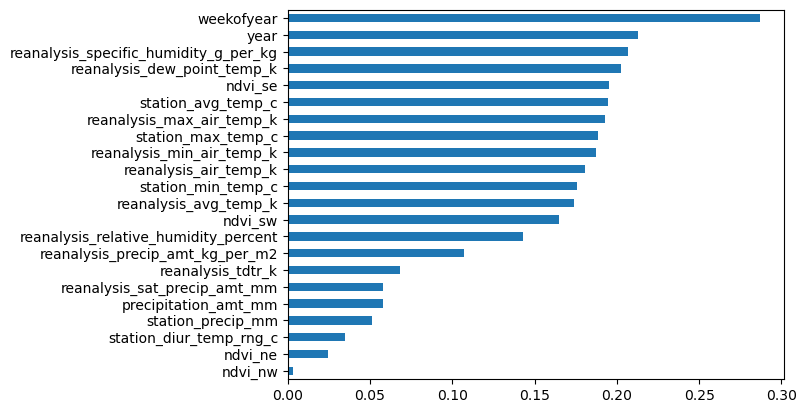

In [125]:
correlations = df.corr()
(abs(correlations)
     .total_cases
     .drop('total_cases')
     .sort_values(ascending=True)
     .plot
     .barh())

In [126]:
# vars_to_choose = abs(correlations).total_cases > 0.1
# vars_to_choose = abs(correlations).total_cases[vars_to_choose].sort_values()[:-3]
# vars_to_choose = vars_to_choose.index.tolist()
# vars_to_choose

In [127]:
# df = pd.concat([df[vars_to_choose], df['total_cases']], axis = 1)

In [14]:
# - Identical columns: 'precipitation_amt_mm' & 'reanalysis_sat_precip_amt_mm' (drop one of them!)
# - Drop ndvi_ne & ndvi_nw
# - Convert to Celsius: reanalysis_air_temp_k reanalysis_avg_temp_k reanalysis_dew_point_temp_k 
# reanalysis_max_air_temp_k reanalysis_min_air_temp_k reanalysis_tdtr_k
# - Take the average of columns representing the same variable from different sources

In [15]:
# We may need to take some outliers out or drop some variables, but it doesn't seem so serious, so we will 
# leave it for now.

# - Feature Engineering Section <br />

In [ ]:
## --------------------------------------- ##
## ----- Further Feature Engineering ----- ##
## --------------------------------------- ##

In [16]:
# df.drop(['ndvi_ne', 'ndvi_nw'], axis = 1, inplace = True)
# df.drop('reanalysis_sat_precip_amt_mm', axis = 1, inplace = True)
# df[['reanalysis_air_temp_k', 'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
#     'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k']] += -273.15

In [19]:
# min_temp = pd.Series(np.mean(df[[col for col in df.columns if '_min_' in col]].values, axis = 1))
# min_temp.index = df.index
# df['min_temp'] = min_temp
# df.drop([col for col in df.columns if '_min_' in col], axis = 1, inplace = True)

# max_temp = pd.Series(np.mean(df[[col for col in df.columns if '_max_' in col]].values, axis = 1))
# max_temp.index = df.index
# df['max_temp'] = max_temp
# df.drop([col for col in df.columns if '_max_' in col], axis = 1, inplace = True)

# reanalysis_avg_temp_c = pd.Series(np.mean(df[['reanalysis_avg_temp_k', 'reanalysis_air_temp_k']], axis = 1))
# reanalysis_avg_temp_c.index = df.index
# df['reanalysis_avg_temp_c'] = reanalysis_avg_temp_c
# df.drop(['reanalysis_avg_temp_k', 'reanalysis_air_temp_k'], axis = 1, inplace = True)

In [22]:
# cols = df.columns.tolist()
# cols = cols[-3:] + cols[:-3]

In [14]:
# correlations = df.corr()
# (correlations
#      .total_cases
#      .drop('total_cases')
#      .sort_values(ascending=False)
#      .plot
#      .barh())

In [ ]:
## -------------------------------------- ##
## ----- End of Feature Engineering ----- ##
## -------------------------------------- ##

# - End of section <br />

<AxesSubplot: xlabel='week_start_date'>

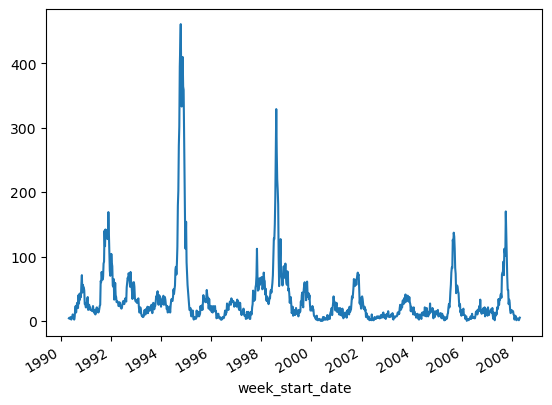

In [128]:
df['total_cases'].plot()

In [33]:
################# -------------------------------------- #################
################# -------------------------------------- #################
################# -------------------------------------- #################
################# -------------------------------------- #################
################# -------------------------------------- #################

In [96]:
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima

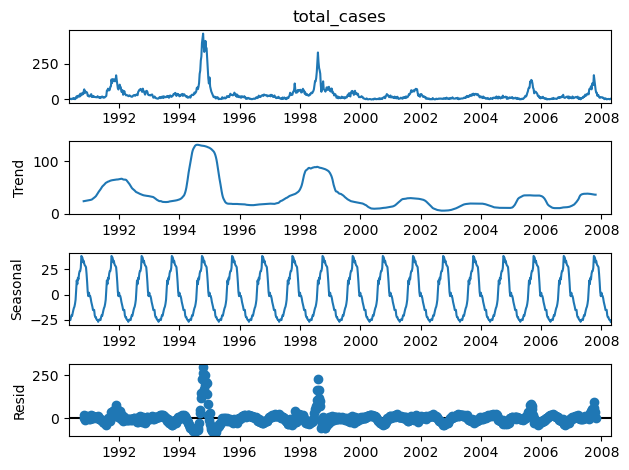

In [98]:
result = seasonal_decompose(x = df['total_cases'], model = 'add', period = 52)
result.plot();

In [99]:
from statsmodels.tsa.stattools import adfuller
import numpy as np

def check_stationarity(yout):
    dftest = adfuller(df['total_cases'])
    adf = dftest[0]
    pvalue = dftest[1]
    critical_value = dftest[4]['5%']
    if (pvalue < 0.05) and (adf < critical_value):
        print('The series is stationary, so D = 0')
    else:
        print('The series is NOT stationary')

In [100]:
seasonal = result.seasonal
check_stationarity(seasonal)

The series is stationary, so D = 0


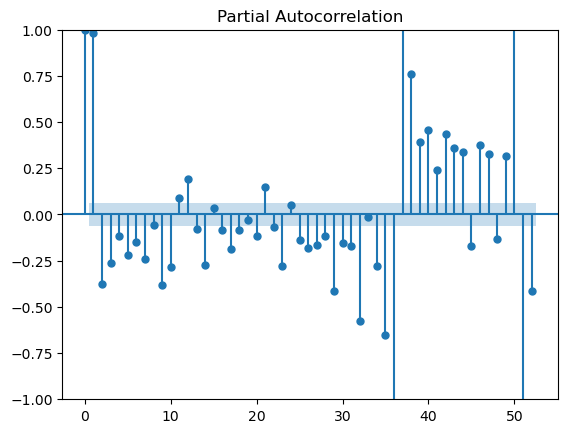

In [101]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_pacf(seasonal, lags = 52)
plt.show()

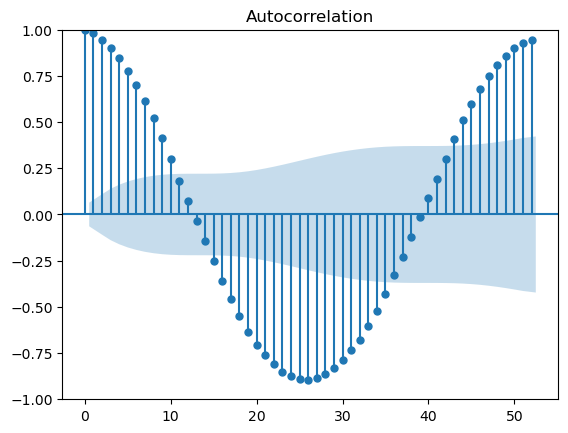

In [102]:
plot_acf(seasonal, lags = 52)
plt.show()

In [103]:
# Q = 0

In [104]:
# This might take a while (a lot actually).
# auto = auto_arima(y = df['total_cases'], X = df.iloc[:, : -1], seasonal = True, m = 52)

In [105]:
# auto

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(0, 0, 0, 52),
      suppress_warnings=True, with_intercept=False)

In [181]:
train_amount = 0.7
df_x_train = df.iloc[:int(train_amount * len(df)), : -1]
df_x_test = df.iloc[int(train_amount * len(df)):, : -1]

df_y_train = df.iloc[:int(train_amount * len(df)), -1]
df_y_test = df.iloc[int(train_amount * len(df)):, -1]

In [182]:
model = SARIMAX(endog = df_y_train, exog = df_x_train, order = (0, 1, 0), seasonal_order = (0, 0, 0, 52),
                enforce_invertibility = False)

In [183]:
results = model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           23     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.84203D+00    |proj g|=  2.64299D-03


 This problem is unconstrained.



At iterate    5    f=  4.10641D+00    |proj g|=  1.94657D-01

At iterate   10    f=  4.10390D+00    |proj g|=  8.41628D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   23     11     27      1     0     0   4.682D-05   4.104D+00
  F =   4.1038968596792245     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [184]:
start = len(df_x_train)
end = len(df_x_train) + len(df_x_test) - 1

In [185]:
predictions = np.round(results.predict(start, end, exog = df_x_test))
predictions.index = df_x_test.index
predictions[predictions < 0] = 0

<AxesSubplot: xlabel='week_start_date'>

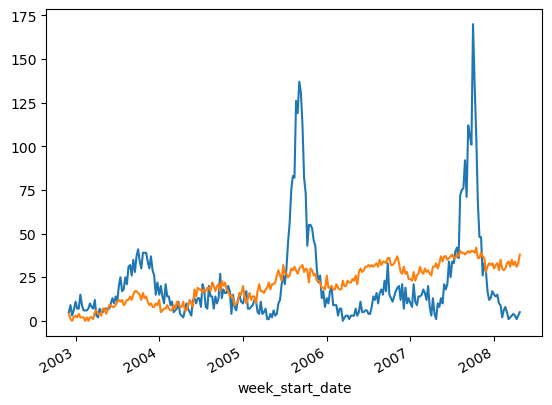

In [186]:
df_y_test.plot()
predictions.plot()

In [187]:
# df_y_test.values

In [188]:
# predictions.values

In [189]:
# Mean Absolute Error Calculation
np.mean(np.abs(df_y_test.values - predictions.values))

16.540925266903916

In [ ]:
# We have only trained on the dataset for San Juan thus far.
# The Iquitos reamins.